In [1]:
#project: p1
#submitter: mchoi82
#partner: None
#hours: 20

In [2]:
# Python Control Flow PART 1

In [3]:
#q1
ans = type(7/2)
ans

float

In [4]:
#q2
x = 4
maximum = 10
minimum = 5
error = False if minimum <= x <= maximum else True
error

True

In [5]:
#q3
word = "KAFKAESQUE"
word = word.lower()
if len(word) < 5:
    ans = False
elif word[len(word)-5:] == 'esque':
    ans = True
else:
    ans = False
suffix_match = ans
suffix_match


True

In [6]:
#q4
def add(n1 = 1, n2 = 1):
    return n1+n2
add(3,4)

7

In [7]:
#q5
add(9)

10

In [8]:
#q6
x = 4
if x < 0:
    status = "negative"
elif x > 0:
    status = "positive"
else:
    status = "zero"
status

'positive'

In [9]:
#q7
def smart_count(lst):
    count = 0
    for elem in lst:
        if elem > 10:
            continue
        elif elem < 0:
            break
        else:
            count += elem
    return count
nums = [3, 4, 1, 6]
smart_count(nums)

14

In [10]:
#q8
smart_count([2, 1, 11, 3, 15, -1, 8, 2])

6

In [11]:
# Python State Part 2

In [12]:
header = ["A", "B", "C"]

coord1 = {"x": 8, "y": 5}
coord2 = {"x": 9, "y": 2}
coord3 = {"x": 3, "y": 1}

rows = [
    [1, 6, coord1],
    [3, 4, coord2],
    [5, 2, coord3],
]

In [13]:
#q9
coord3["z"] = 3.14
rows

[[1, 6, {'x': 8, 'y': 5}],
 [3, 4, {'x': 9, 'y': 2}],
 [5, 2, {'x': 3, 'y': 1, 'z': 3.14}]]

In [14]:
#q10
rows[0][-1]['x']

8

In [15]:
#q11
import copy
v2 = copy.deepcopy(rows)
v2[0] = 8888 #first change
v2 = copy.copy(rows)
v2[1][1] = 9999 
rows


[[1, 6, {'x': 8, 'y': 5}],
 [3, 9999, {'x': 9, 'y': 2}],
 [5, 2, {'x': 3, 'y': 1, 'z': 3.14}]]

In [16]:
#q12
header.index('B')
count = 0
for i in range(3):
    count += rows[i][header.index('B')]
count

10007

In [17]:
#q13
def get_column_b(row):
    print("lookup A column for a row")
    return row[header.index("B")]

rows.sort(key=get_column_b, reverse=False) #descending: True, ascending: False
rows

lookup A column for a row
lookup A column for a row
lookup A column for a row


[[5, 2, {'x': 3, 'y': 1, 'z': 3.14}],
 [1, 6, {'x': 8, 'y': 5}],
 [3, 9999, {'x': 9, 'y': 2}]]

In [18]:
#q14
import json
f = open("usd.json")
data = json.load(f)
f.close()
#print(type(data))
key = data['eur']
currency = data['eur']['rate']
ans = 400 * currency
ans
#print('key:',key)
#print('data:', data)


401.36329745992

In [19]:
#q15
def divide(n1, n2):
    try:
        ans = n1/n2
    except:
        ans = float("nan")
    return ans
divide(3,2)

1.5

In [20]:
#q16
divide(-3,0)

nan

In [21]:
#Python Data Science Part 3

In [22]:
#q17
import os
import pandas as pd
path = "home-computers"
dirs = os.listdir(path)
#cwd = os.getcwd()
#print(cwd)
dic = {}
for elem in dirs:
    #print(elem)
    #print(elem[-4:])
    if elem[-4:] != '.csv':
        continue
    else:
        index = elem.find('.')
        year = elem[index - 4 : index]
        path_dataframe = pd.read_csv(path+'/'+elem, skiprows = 1)
        path_dataframe = path_dataframe.set_index('Geographic Area Name')
        dic[int(year)] = path_dataframe
sorted(dic.keys())
    

[2013, 2014, 2015, 2016, 2017, 2018]

In [23]:
#q18
position = 'Wisconsin'
label = 'Estimate!!Total'
output = dic[2018].at[position, label]
output

2371960

In [24]:
#q19
count = 0
for elem in dic[2018]["Estimate!!Total!!No Computer"]:
    count += elem
count

10285814

In [25]:
#q20
access = dic[2018]
margin = access['Margin of Error!!Total!!No Computer']
estimate = access['Estimate!!Total!!No Computer']
max(margin/estimate)

0.12375641594322287

In [26]:
#q21
dic_1 = {}
states = ['Illinois', 'Indiana', 'Iowa', 'Michigan', 'Minnesota', 'Wisconsin']
label, label_no_comp = 'Estimate!!Total', 'Estimate!!Total!!No Computer'
for elem in states:
    dic_1[elem] = (access.at[elem, label_no_comp])/(access.at[elem, label]) * 100
dic_1

{'Illinois': 8.524143737625552,
 'Indiana': 9.463486214247707,
 'Iowa': 9.468929459023103,
 'Michigan': 8.936374942955922,
 'Minnesota': 7.491847623005652,
 'Wisconsin': 9.582497175331794}

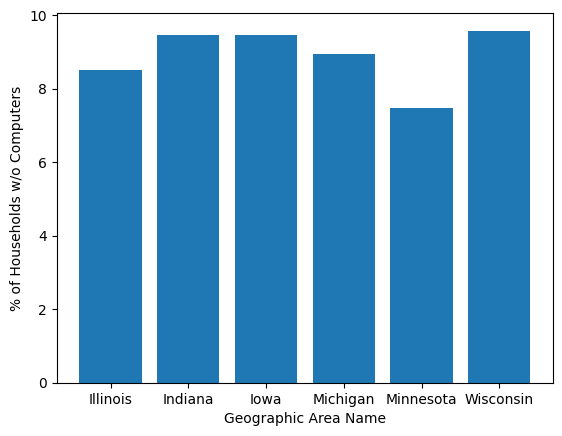

In [27]:
#q22
import matplotlib.pyplot as plt
data = dic_1
state = list(dic_1.keys())
percent = list(dic_1.values())
#fig = plt.figure(figsize = (10, 5))
plt.bar(state, percent)
plt.xlabel('Geographic Area Name')
plt.ylabel('% of Households w/o Computers')
plt.show()



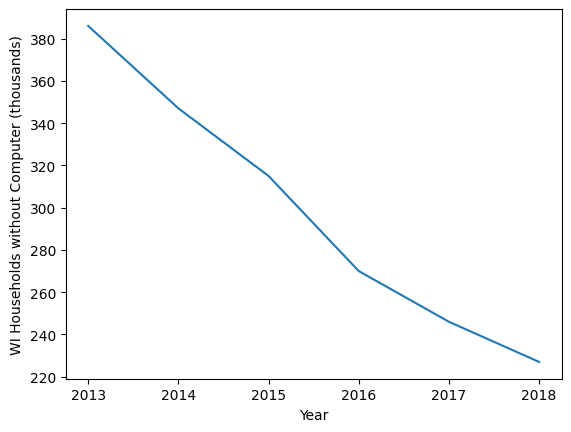

In [28]:
#q23
no_comp_val = []
position_1, label = 'Wisconsin', 'Estimate!!Total!!No Computer'
output = dic[2013].at[position_1, label]
no_comp_val.append(output)

position_2, label = 'Wisconsin', 'Estimate!!Total!!No Computer'
output = dic[2014].at[position_2, label]
no_comp_val.append(output)


position_3, label = 'Wisconsin', 'Estimate!!Total!!No Computer'
output = dic[2015].at[position_3, label]
no_comp_val.append(output)


position_4, labe = 'Wisconsin', 'Estimate!!Total!!No Computer'
output = dic[2016].at[position_4, label]
no_comp_val.append(output)


position_5, label = 'Wisconsin', 'Estimate!!Total!!No Computer'
output = dic[2017].at[position_5, label]
no_comp_val.append(output)


position_6, label = 'Wisconsin', 'Estimate!!Total!!No Computer'
output = dic[2018].at[position_6, label]
no_comp_val.append(output)

new_no_comp = []
for elem in no_comp_val:
    new_no_comp.append(int(elem / 1000))
    

year = [2013, 2014, 2015, 2016, 2017, 2018]


plt.plot(year, new_no_comp)
plt.xlabel('Year')
plt.ylabel('WI Households without Computer (thousands)')
plt.show()

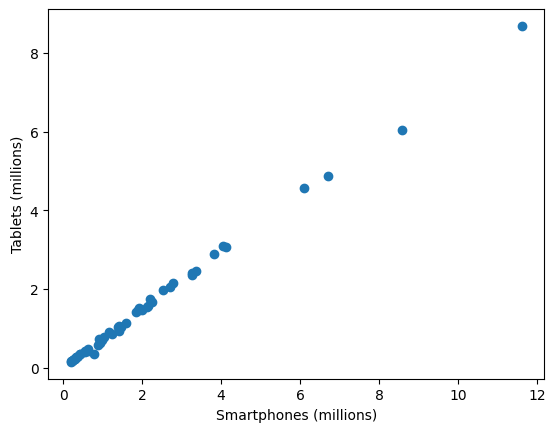

In [29]:
#q24
smartphones = []
tablets = []
for elem in dic[2018]["Estimate!!Total!!Has one or more types of computing devices!!Smartphone"]:
    smartphones.append(elem/1000000)
for num in dic[2018]["Estimate!!Total!!Has one or more types of computing devices!!Tablet or other portable wireless computer"]:
    tablets.append(num/1000000)
plt.scatter(smartphones, tablets)
plt.xlabel('Smartphones (millions)')
plt.ylabel('Tablets (millions)')
plt.show()

In [30]:
#q25
from subprocess import check_output
check_output(['git', 'checkout', 'main'], cwd = 'flask')
s = str(check_output(['git', 'log'], cwd = 'flask'),'utf-8')
#print(s)
s.strip().split('\n')[0]


Already on 'main'


'commit 660994efc761efdfd49ca442b73f6712dc77b6cf'

In [31]:
#q26
log_lst = s.strip().split('\n')
lst = []
for i in range(len(log_lst)-1, -1, -1):
    if log_lst[i][:6] != 'commit':
        continue
    else:
        lst.append(log_lst[i])
        if len(lst) == 50:
            break
lst = lst[::-1]
commit_num = []
for elem in lst:
    new = elem[7:]
    commit_num.append(new)
commit_num

['7b5015010bc8c2a2d56c7c50b37e5b9facdad102',
 '40e0024d7b87150ed694829a5335bd2435962225',
 '6dd92ae4b32c336564231e10db12458a8b9261ca',
 '1246f4088a4fdc00a79f8029ff5d77bfe4fc9b14',
 'c4f5c2fb9afc1679c085500830bd53fab93ad885',
 '1d8432ebfd1637eacab79a15e9b7963bf061371c',
 'fc94599285aa1aec50b3c9426697249e55edda0a',
 'c33675f0251071ea47ce166b81ce8c637842f091',
 '2d9bb692728fd76b19e467499caa4f5fcb07aede',
 'ca520fb7e4c29afccc637e61c11429a0f3e8d5ad',
 '08f1f0dc32004fae01cf96d1eed84e6461e698e5',
 '8009bd986940378bba1399dbfce90d03e441467b',
 'a42728568e18bedf588be2357b56021ab85b9fad',
 '959b5df00431c436474c5abca304e631c0de7721',
 '4affedec356ad8c9e6a107578f03fc7f5c615064',
 'de03143f6ecf9a36dd32f16f07309c64d4de03b0',
 'a01e8b49ca66608f0bd46134ff02deeb5724c799',
 '36071ca1f42a26ef327e9d14e4909a8c92cd4fae',
 '51c9829a9cdfa2bf301431f686d7a404cc7c5083',
 '2f5a4f8dbc832b0daebcd66ea8b3969589191fa7',
 '03148dba6b26a2694da1d466584f50189c52e7b3',
 'ef524f2cfd65377b3b9ce896e7a710472b13c0f6',
 'f2dc38cd

In [32]:
#q27
check_output(['git', 'checkout', commit_num[-3]], cwd = 'flask')
f = open('flask/README')
f.read()

Note: switching to '4ec7d2a0d8eac4f915dc0d38a886cd57045bb0c4'.

You are in 'detached HEAD' state. You can look around, make experimental
changes and commit them, and you can discard any commits you make in this
state without impacting any branches by switching back to a branch.

If you want to create a new branch to retain commits you create, you may
do so (now or later) by using -c with the switch command. Example:

  git switch -c <new-branch-name>

Or undo this operation with:

  git switch -

Turn off this advice by setting config variable advice.detachedHead to false

HEAD is now at 4ec7d2a0 Started working on documentation.


"\n                        // Flask //\n\n     because a pocket knife is not the only thing that\n                    might come in handy\n\n\n    ~ What is Flask?\n\n      Flask is a microframework for Python based on Werkzeug\n      and Jinja2.  It's intended for small scale applications\n      and was development with best intentions in mind.\n\n   ~ Is it ready?\n\n      Nope, this is still work in progress, but I am happy to\n      accept patches and improvements already.\n"

In [33]:
#q28
#s = str(check_output(['git', 'log'], cwd = 'flask'),'utf-8'

#for elem in s:
    #print(elem)
#print(s)

check_output(['git', 'checkout', 'main'], cwd = 'flask')
s = str(check_output(['git', 'log'], cwd = 'flask'),'utf-8')
#print(s)
s = s.split("\n")
#print(s)


dic = {}
new_dic = {}
for i in range(len(s)):
    if 'Merge pull' in s[i] and '/' in s[i]:
        elem = s[i].split('/')[0]
        elem_split = elem.split(' ')
        name = elem_split[-1]
        if name in dic:
            dic[name] += 1
        else:
            dic[name] = 1
    else:
        continue
for key, val in dic.items():
    if val >= 5:
        new_dic[key] = val
new_dic




Previous HEAD position was 4ec7d2a0 Started working on documentation.
Switched to branch 'main'


{'pallets': 204,
 'pgjones': 14,
 'greyli': 42,
 'ThiefMaster': 11,
 'jeffwidman': 8,
 'garenchan': 8,
 'davidism': 45,
 'dawran6': 7,
 'untitaker': 20,
 'lord63-forks': 5,
 'methane': 5,
 'Winnetou': 6,
 'defuz': 6,
 'ThomasWaldmann': 13,
 'SimonSapin': 11}

In [34]:
#q29
#check_output(["pip3", "instal"])
import subprocess

try:
    msg = str(check_output(["pip3", "instal"], stderr=subprocess.STDOUT), 'utf-8')
except subprocess.CalledProcessError as e:
    msg = str(e.output, 'utf-8')
    
msg

'ERROR: unknown command "instal" - maybe you meant "install"\n'

<AxesSubplot:xlabel='Rows', ylabel='Milliseconds'>

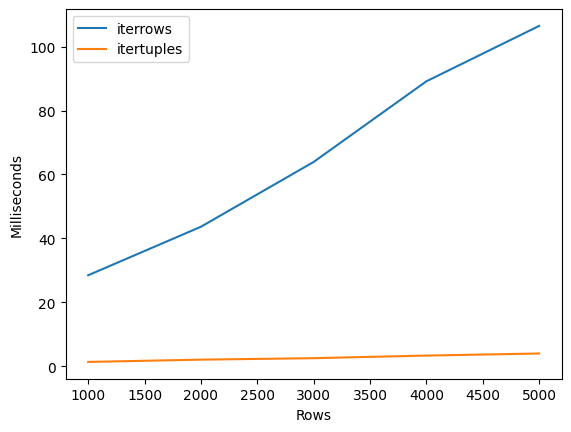

In [35]:
#q30
import numpy as np
from time import time
def rand_df(rows):
    return pd.DataFrame(np.random.randint(10, size=(rows, 4)),
                        columns=["A", "B", "C", "D"],
                        index=[f"r{i}" for i in range(1, rows+1)])



time_row = []
time_tup = []
for i in range(1000, 5001, 1000):
    df = rand_df(i)
    #print(df)
    t0_row = time()
    for row in df.iterrows():
        pass
    t1_row = time()

    t0_tuples = time()
    for tuples in df.itertuples():
        pass
    t1_tuples = time()
    time_row.append((t1_row - t0_row)*1000)
    time_tup.append((t1_tuples - t0_tuples)*1000)
    
    
    
    
num_rows = []
a = 0
for i in range(5):
    num_rows.append(1000 + a)
    a += 1000
    

    
times_df = pd.DataFrame(dtype=float)
times_df.at[num_rows[0], "iterrows"] = time_row[0]
times_df.at[num_rows[1], "iterrows"] = time_row[1]
times_df.at[num_rows[2], "iterrows"] = time_row[2]
times_df.at[num_rows[3], "iterrows"] = time_row[3]
times_df.at[num_rows[4], "iterrows"] = time_row[4]


times_df.at[num_rows[0], "itertuples"] = time_tup[0]
times_df.at[num_rows[1], "itertuples"] = time_tup[1]
times_df.at[num_rows[2], "itertuples"] = time_tup[2]
times_df.at[num_rows[3], "itertuples"] = time_tup[3]
times_df.at[num_rows[4], "itertuples"] = time_tup[4]


times_df.plot.line(xlabel = 'Rows',ylabel = 'Milliseconds')

<AxesSubplot:xlabel='Rows', ylabel='Milliseconds'>

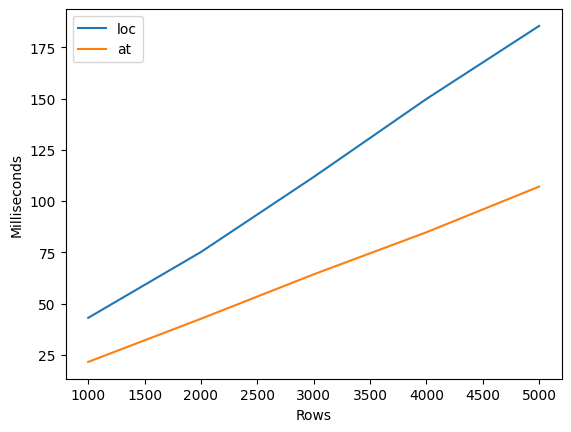

In [36]:
#q31
time_loc = []
time_at = []
for i in range(1000, 5001, 1000):
    df = rand_df(i)
    #print(df)
    t0_loc = time()
    total_loc = 0
    for idx in df.index:
        for col in df.columns:
            total_loc += df.loc[idx, col]
    t1_loc = time()

    
    t0_at = time()
    total_at = 0
    for idx in df.index:
        for col in df.columns:
            total_at += df.at[idx, col]
    t1_at = time()
    time_loc.append((t1_loc - t0_loc)*1000)
    time_at.append((t1_at - t0_at)*1000)
    
    
    
    
num_rows = []
a = 0
for i in range(5):
    num_rows.append(1000 + a)
    a += 1000
    

    
times_df = pd.DataFrame(dtype=float)
times_df.at[num_rows[0], "loc"] = time_loc[0]
times_df.at[num_rows[1], "loc"] = time_loc[1]
times_df.at[num_rows[2], "loc"] = time_loc[2]
times_df.at[num_rows[3], "loc"] = time_loc[3]
times_df.at[num_rows[4], "loc"] = time_loc[4]


times_df.at[num_rows[0], "at"] = time_at[0]
times_df.at[num_rows[1], "at"] = time_at[1]
times_df.at[num_rows[2], "at"] = time_at[2]
times_df.at[num_rows[3], "at"] = time_at[3]
times_df.at[num_rows[4], "at"] = time_at[4]


times_df.plot.line(xlabel = 'Rows',ylabel = 'Milliseconds')

[1000, 5000, 10000, 15000, 20000]


<AxesSubplot:xlabel='Rows', ylabel='Milliseconds'>

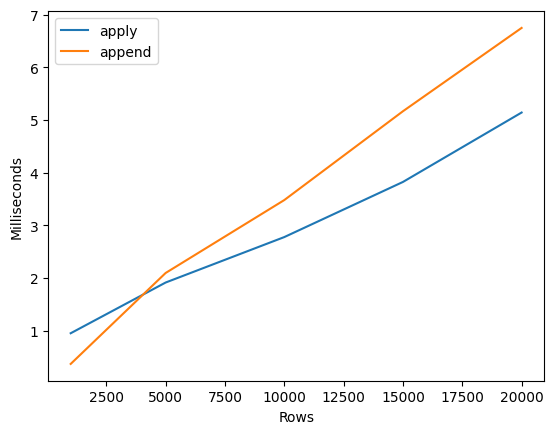

In [37]:
#q32
def laugh(x):
    return "ha" * x



time_apply = []
time_append = []



i_val = [1000]
i = 0
while i < 20000:
    i += 5000
    i_val.append(i)
    #print(i_val)
    
for elem in i_val:
    df = rand_df(elem)
    #print(df)
    t0_apply = time()
    total_loc = 0
    result = df["A"].apply(laugh).tolist()
    t1_apply = time()

    
    t0_append = time()
    result = []
    for val in df["A"]:
        result.append(laugh(val))
    t1_append = time()
    time_apply.append((t1_apply - t0_apply)*1000)
    time_append.append((t1_append - t0_append)*1000)
    
    
    
    
num_rows = [1000]
a = 5000
for i in range(4):
    num_rows.append(a)
    a += 5000
print(num_rows)

    
times_df = pd.DataFrame(dtype=float)
times_df.at[num_rows[0], "apply"] = time_apply[0]
times_df.at[num_rows[1], "apply"] = time_apply[1]
times_df.at[num_rows[2], "apply"] = time_apply[2]
times_df.at[num_rows[3], "apply"] = time_apply[3]
times_df.at[num_rows[4], "apply"] = time_apply[4]


times_df.at[num_rows[0], "append"] = time_append[0]
times_df.at[num_rows[1], "append"] = time_append[1]
times_df.at[num_rows[2], "append"] = time_append[2]
times_df.at[num_rows[3], "append"] = time_append[3]
times_df.at[num_rows[4], "append"] = time_append[4]


times_df.plot.line(xlabel = 'Rows',ylabel = 'Milliseconds')